In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
# # importing the zipfile module
# from zipfile import ZipFile

# # loading the temp.zip and creating a zip object
# with ZipFile("/content/drive/MyDrive/Car_dataset.zip", 'r') as zObject:

# 	# Extracting all the members of the zip
# 	# into a specific location.
# 	zObject.extractall(
# 		path="/content/drive/MyDrive/Car_Dataset/")


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
!pip install pytesseract
import pytesseract as pt
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet

from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = glob('/content/drive/MyDrive/Car_Dataset/images/*.xml')
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [ ]:
df = pd.DataFrame(labels_dict)
df.to_csv('labels.csv',index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/Car_Dataset/images/N1.xml,1093,1396,645,727
1,/content/drive/MyDrive/Car_Dataset/images/N100...,134,301,312,350
2,/content/drive/MyDrive/Car_Dataset/images/N101...,31,139,128,161
3,/content/drive/MyDrive/Car_Dataset/images/N102...,164,316,216,243
4,/content/drive/MyDrive/Car_Dataset/images/N103...,813,1067,665,724


In [ ]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('/content/drive/MyDrive/Car_Dataset/images',filename_image)
    return filepath_image
getFilename(filename)

'/content/drive/MyDrive/Car_Dataset/images/N1.jpeg'

In [ ]:
#random checking images
image_path = list(df['filepath'].apply(getFilename))
image_path[:10]#random check

['/content/drive/MyDrive/Car_Dataset/images/N1.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N100.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N101.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N102.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N103.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N104.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N105.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N106.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N107.jpeg',
 '/content/drive/MyDrive/Car_Dataset/images/N108.jpeg']


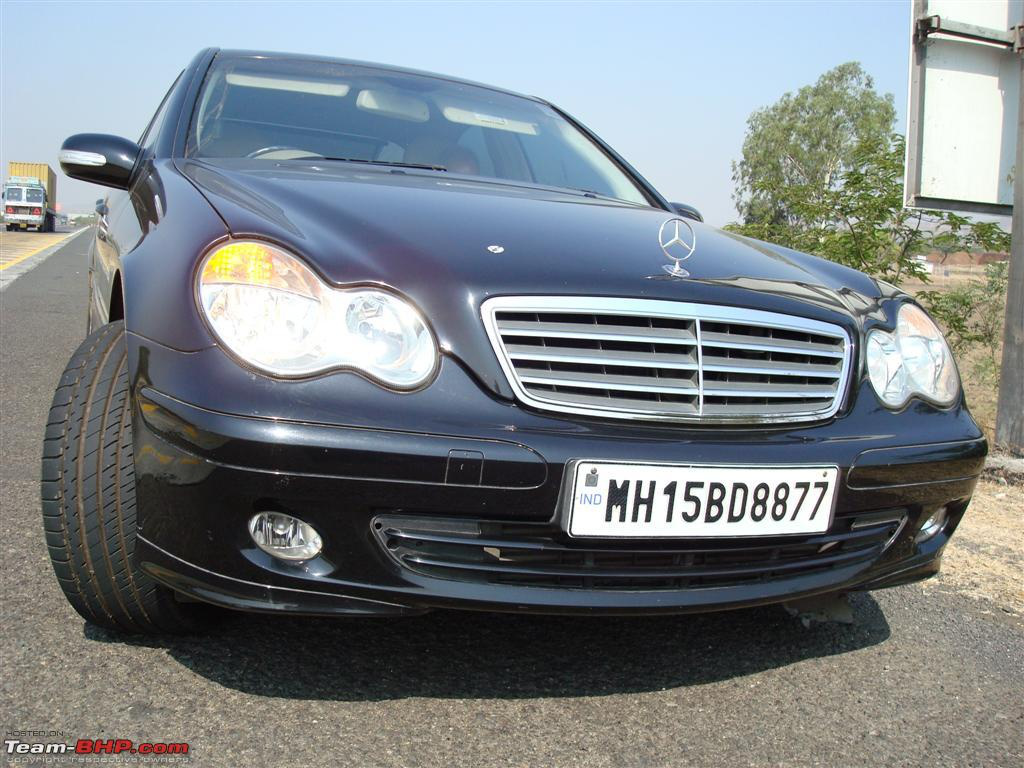

In [ ]:
#verify data

file_path = image_path[87] #path of our image N2.jpeg
img = cv2.imread(file_path) #read the image
xmin-1804/ymin-1734/xmax-2493/ymax-1882 
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 8 - N2.jpeg with bounding box')
fig.add_shape(type='rect',x0=1804, x1=2493, y0=1734, y1=1882, xref='x', yref='y',line_color='cyan')

In [ ]:
# DATA PROCESSING

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import load_img

# image_path = ['image1.jpg', 'image2.jpg', 'image3.jpg']
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    if img_arr is not None:
        h,w,d = img_arr.shape
        # Prepprocesing
        load_image = load_img(image,target_size=(224,224))
    else:
        print(f"Error: Could not read image file {image}")

In [ ]:
# print('/content/drive/MyDrive/Car_Dataset/images/N209.jpeg')
# plt.show('/content/drive/MyDrive/Car_Dataset/images/N209.jpeg')

In [ ]:
# print('/content/drive/MyDrive/dataset/images/'+df['/content/drive/MyDrive/Car_Dataset/images/N237.jpeg'][index])

In [ ]:
#Reading data

import cv2
from tensorflow.keras.preprocessing.image import load_img

#Targeting all our values in array selecting all columns
labels = df.iloc[:,1:].values
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [ ]:
# Split data into  TRAIN AND TEST SET

In [ ]:
# Convert data to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [ ]:
# Split the data into training and testing set using sklearn.
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((144, 224, 224, 3), (36, 224, 224, 3), (144, 4), (36, 4))

In [ ]:
#  INCEPTION-RESNET-V2 MODEL BUILDING
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)


# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [ ]:
# Complie model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_609 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_609 (Batch  (None, 111, 111, 32  96         ['conv2d_609[0][0]']             
 Normalization)                 )                                                           

In [ ]:
tfb = TensorBoard('object_detection')
# history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=50,validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/50
15/15 [==============================] - 97s 475ms/step - loss: 0.0497 - val_loss: 0.0336
Epoch 2/50
15/15 [==============================] - 4s 238ms/step - loss: 0.0211 - val_loss: 0.0180
Epoch 3/50
15/15 [==============================] - 3s 231ms/step - loss: 0.0105 - val_loss: 0.0217
Epoch 4/50
15/15 [==============================] - 3s 221ms/step - loss: 0.0080 - val_loss: 0.0147
Epoch 5/50
15/15 [==============================] - 3s 226ms/step - loss: 0.0063 - val_loss: 0.0116
Epoch 6/50
15/15 [==============================] - 4s 241ms/step - loss: 0.0047 - val_loss: 0.0113
Epoch 7/50
15/15 [==============================] - 3s 227ms/step - loss: 0.0039 - val_loss: 0.0106
Epoch 8/50
15/15 [==============================] - 3s 223ms/step - loss: 0.0038 - val_loss: 0.0131
Epoch 9/50
15/15 [==============================] - 3s 228ms/step - loss: 0.0032 - val_loss: 0.0128
Epoch 10/50
15/15 [==============================] - 4s 245ms/step - loss: 0.0024 - val_loss: 0.012

In [ ]:
# model.save('/content/drive/MyDrive/Car_Dataset/object_detection.h5')

In [ ]:
import tensorflow as tf

#Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/Car_Dataset/object_detection.h5')
print('Model loaded Sucessfully')

Model loaded Sucessfully


In [ ]:
path = '/content/drive/MyDrive/Car_Dataset/TEST/images (4).jpg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # Convert into array and get the normalized output

# Size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 160
Width of the image = 213



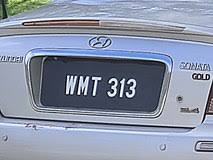

In [ ]:
fig = px.imshow(image)
fig.update_layout(width=700, height=500,  margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Car TEST Image')

In [ ]:
image_arr_224.shape

(224, 224, 3)

In [ ]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [ ]:
#De normalization
# Make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 6s 6s/step


array([[0.30954668, 0.727599  , 0.44939497, 0.5918997 ]], dtype=float32)

In [ ]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 65.93344268, 154.97859228,  71.90319538,  94.70395088]])

In [ ]:
#Bounding Boxes
coords = coords.astype(np.int32)
coords

array([[ 65, 154,  71,  94]], dtype=int32)

In [ ]:
# Draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)

(65, 71) (154, 94)



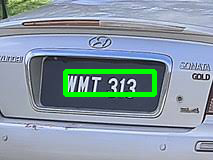

In [ ]:
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
fig = px.imshow(image)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))

1/1 [==============================] - 1s 556ms/step
(328, 475) (572, 540)



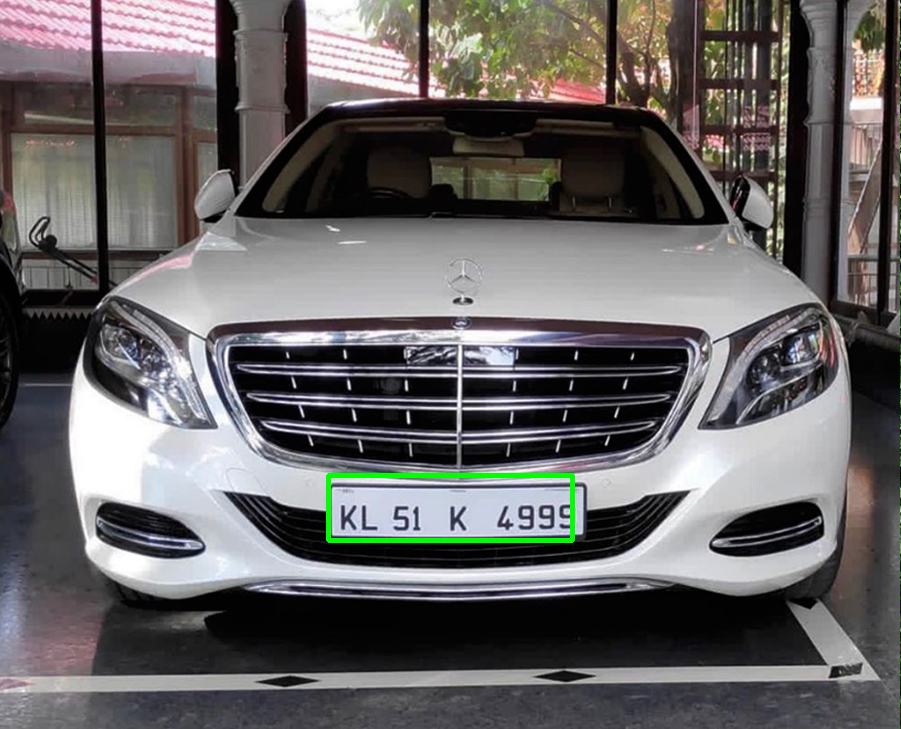

In [ ]:
# Create pipeline
path = '/content/drive/MyDrive/Car_Dataset/TEST/TEST.jpeg'
def object_detection(path):
    
    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)
    
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image, cods = object_detection(path)

fig = px.imshow(image)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 14')




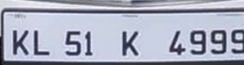

In [ ]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]
fig = px.imshow(roi)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10))
# ,xaxis_title='Figure 15 Cropped image')
# Save the modified image
# cv2.imwrite("/content/drive/MyDrive/Car_Dataset/TEST/modified_image.jpg", img)




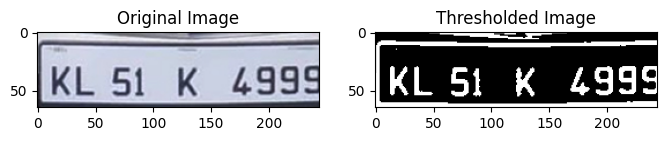

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the image
# img = io.imread('/content/drive/MyDrive/Car_Dataset/TEST/images (3).jpg')

# Convert the image to grayscale
gray_img = color.rgb2gray(roi)

# Calculate the percentage of white pixels in the image
white_pixels = np.sum(gray_img > 0.5) / gray_img.size

# If the percentage of white pixels is greater than 70%, apply black thresholding
if white_pixels > 0.7:
    thresh_img = filters.threshold_otsu(gray_img)
    binary_img = gray_img < thresh_img
else:
    # Otherwise, apply white thresholding
    thresh_img = filters.threshold_otsu(gray_img)
    binary_img = gray_img > thresh_img

# Display the original and thresholded images
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.imshow(roi)
ax1.set_title('Original Image')

ax2.imshow(binary_img, cmap='gray')
ax2.set_title('Thresholded Image')

plt.show()


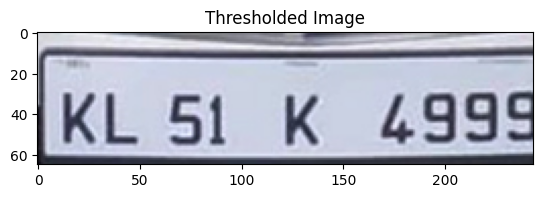

KL Si K 4999



In [ ]:
import pytesseract as pt
import matplotlib.pyplot as plt

# Read text from the thresholded image
text = pt.image_to_string(roi)

# Display the thresholded image
plt.imshow(roi, cmap='gray')
plt.title('Thresholded Image')
plt.show()

# Print the extracted text
print(text)

In [ ]:
# !pip install craft-text-detector


In [ ]:
# from craft_text_detector import text_detector
# import cv2

# # Load the image
# image = cv2.imread('path_to_image.jpg')

# # Create a CRAFT detector
# detector = craft_detector.CRAFT()

# # Set the minimum text height to 2 lines
# min_text_height = 2 * detector.text_height

# # Detect text regions in the image
# text_regions = detector.detect_text(image, min_text_height)

# # Print the detected text regions
# for text_region in text_regions:
#     print(text_region)


In [ ]:
# !pip install pytesseract

In [ ]:
# import matplotlib.pyplot as plt

# # Display the thresholded image
# plt.imshow(binary_img, cmap='gray')
# plt.title('Thresholded Image')
# plt.show()




In [ ]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract

In [ ]:
# extract text from image

import pytesseract as pt
text = pt.image_to_string(binary_img)
print(text)

In [ ]:
import pytesseract as pt
import matplotlib.pyplot as plt

# Read text from the thresholded image
text = pt.image_to_string(binary_img)

# # Display the thresholded image
# plt.imshow(binary_img, cmap='gray')
# plt.title('Thresholded Image')
# plt.show()

# Print the extracted text
print(text)


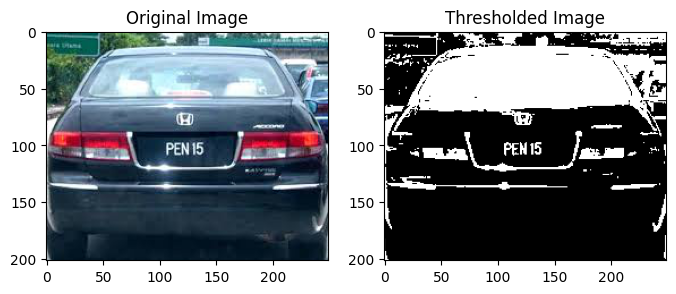

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the image
img = io.imread('/content/drive/MyDrive/Car_Dataset/TEST/images (3).jpg')

# Convert the image to grayscale
gray_img = color.rgb2gray(img)

# Calculate the percentage of white pixels in the image
white_pixels = np.sum(gray_img > 0.5) / gray_img.size

# If the percentage of white pixels is greater than 70%, apply black thresholding
if white_pixels > 0.7:
    thresh_img = filters.threshold_otsu(gray_img)
    binary_img = gray_img < thresh_img
else:
    # Otherwise, apply white thresholding
    thresh_img = filters.threshold_otsu(gray_img)
    binary_img = gray_img > thresh_img

# Display the original and thresholded images
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.imshow(img)
ax1.set_title('Original Image')

ax2.imshow(binary_img, cmap='gray')
ax2.set_title('Thresholded Image')

plt.show()
